In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
data=pd.read_csv('housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Ocean Proximity is a categorical variable. Let's see what values it contain.

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

ISLAND has only 5 entries. I'll be adding these to other class in subsequent stages (in GetDummies class)

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

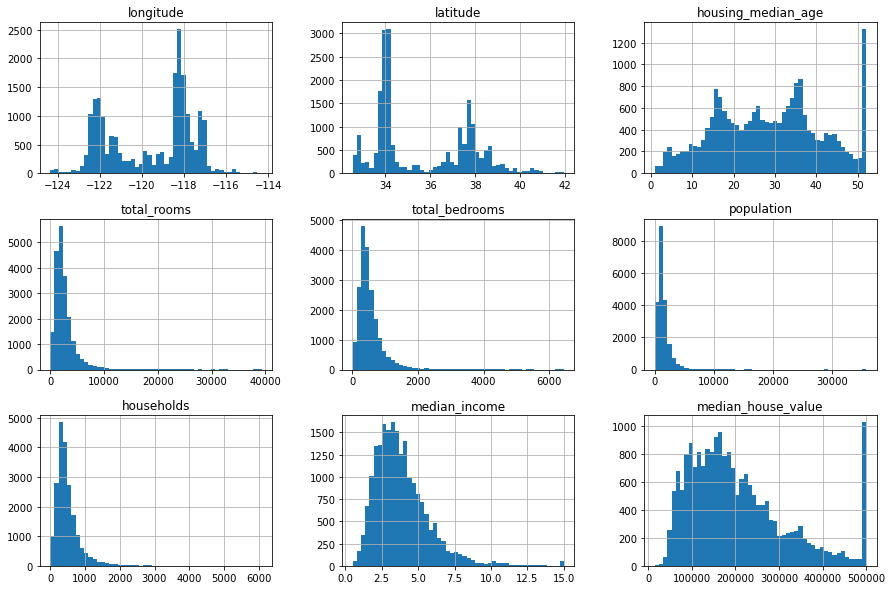

In [9]:
data.hist(bins=50,figsize=(15,10))

From above histograms it's clear that most of the features are skewed. It seems that housing_median_age and median_housing_value have been capped a the end (Peak at the end).

# Getting test dataset

Used Stratified sampling technique

Defined a new feature income_cat which is income category and used if for sampling

In [10]:
data['income_cat']=np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['income_cat']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [14]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [15]:
strat_train_set.to_csv("strat_train_set.csv",index=False)
strat_test_set.to_csv("strat_test_set.csv",index=False)

# Exploratory Data Analysis

In [16]:
data=pd.read_csv('strat_train_set.csv')
#data.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Distribution of households')

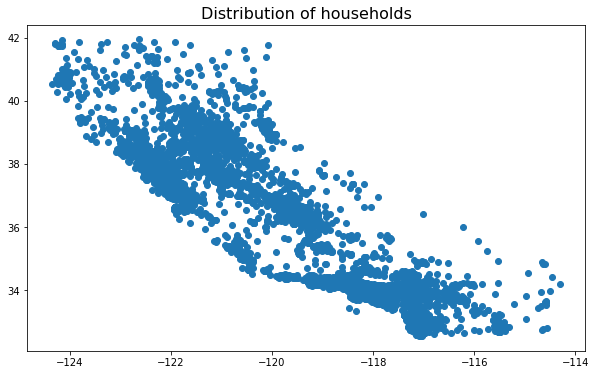

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

By setting alpha=0.1, we can see high density areas.

Text(0.5, 1.0, 'Distribution of households')

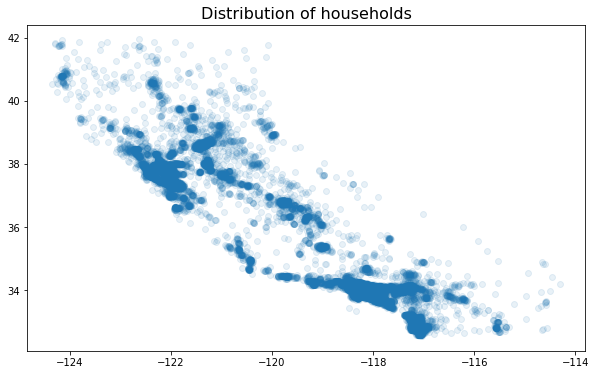

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

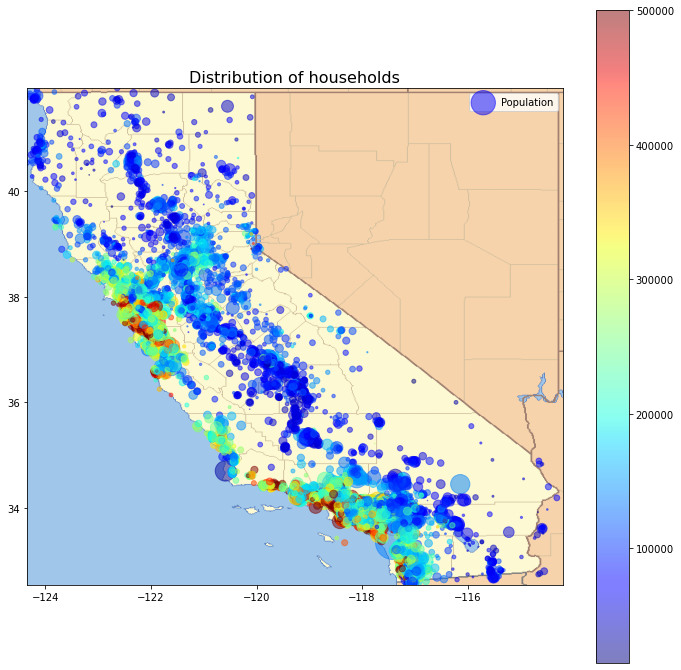

In [21]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

From above plot we can infer that,

1.Housing prices are much related to location and population density.

2.Housing prices near ocean are higher except in northern california.

Now, see the correlation of 'medial house value' with other columns. This is Pearson's correlation coefficient.

In [23]:
corr_matrix=data.corr()

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

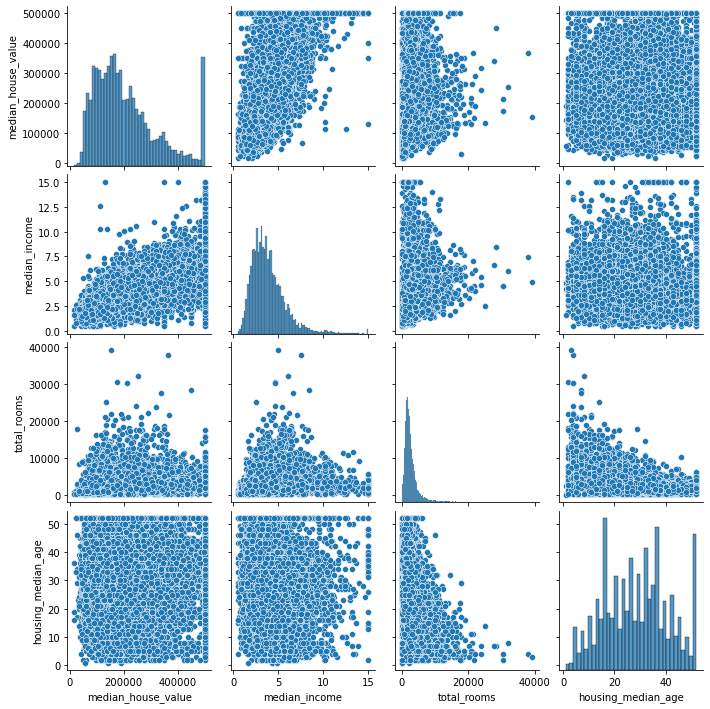

In [25]:
sns.pairplot(data[['median_house_value','median_income','total_rooms','housing_median_age']])

Median Income is the most promising attribute to get Median Hosung Price

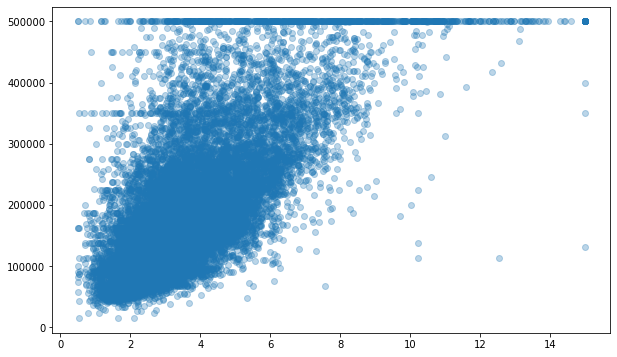

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['median_house_value'],x=data['median_income'],alpha=0.3)

A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model.

# Creating new features:

1.rooms per household

2.bedrooms per room

3.population per household

Initially creating them on a copy of dataset and checing whether they are making any difference.

In [28]:
data1=data.copy()

In [29]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']

In [30]:
data1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555


In [31]:
corr_matrix=data1.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

It is clear that rooms_per_household and bedrooms_per_room have better correlation with median_house_value than total_rooms and total_bedrooms.

I have created classes for vindividual data manupulation job so that I can add then into a pipeline

In [33]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """This class adds new features in the dataset.
        Features added are : rooms_per_household, bedrooms_per_room, and population_per_household.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X

# Null Value Imputation

In [34]:
#Get number of Null Values
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[data[i].isnull()][i]))

In [35]:
get_null_count(data)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  158
population :  0
households :  0
median_income :  0
median_house_value :  0
ocean_proximity :  0


In [36]:
data_null=data[data['total_bedrooms'].isnull()]

Plotting null values to check for any patterns.

For example: whether all nulls are concentrated in region or not

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


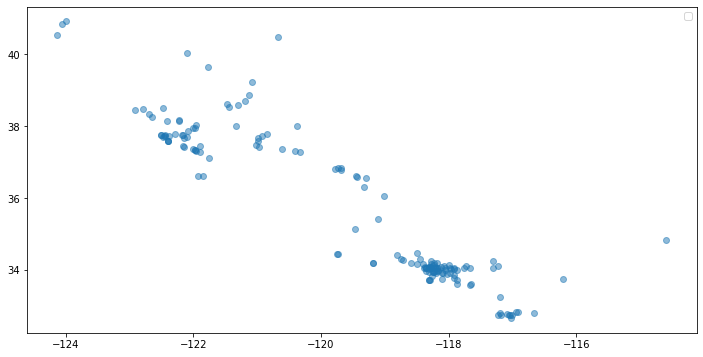

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(x=data_null['longitude'],y=data_null['latitude'],alpha=0.5)
plt.legend()

There is not any specific pattern in null values except a dense spot near -118 longitude

Then, plotted histograms of columns with null values.

array([[<AxesSubplot:title={'center':'bedrooms_per_room'}>]], dtype=object)

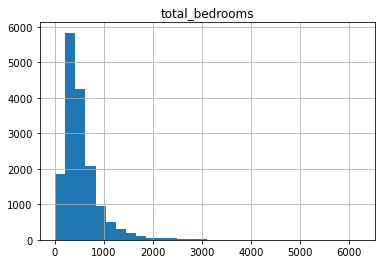

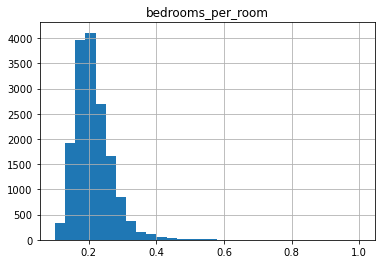

In [39]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

As the distributions of total_bedrooms and bedrooms_per_room are skewed, it's better to replace null values by median. I have used sklearn's Imputer to do this job

# Removing outliers

In [40]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

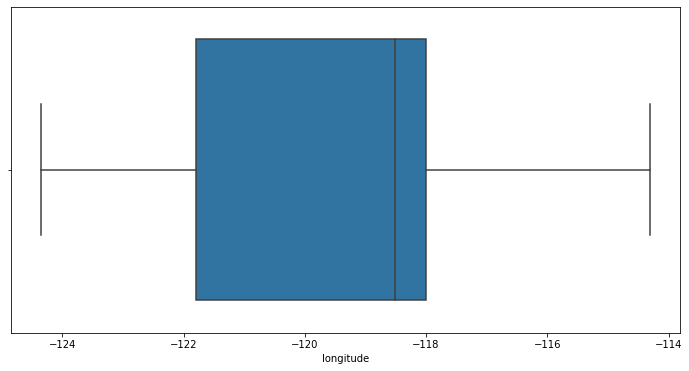

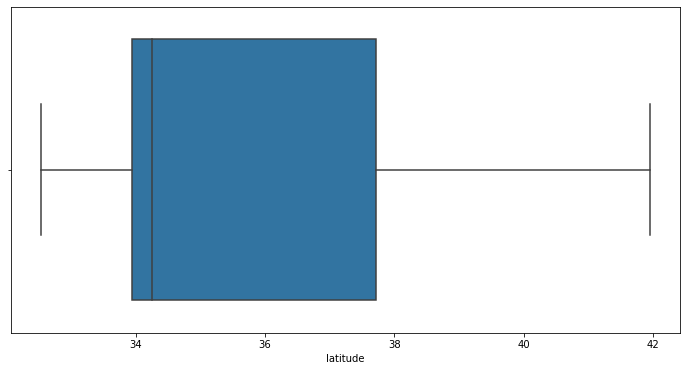

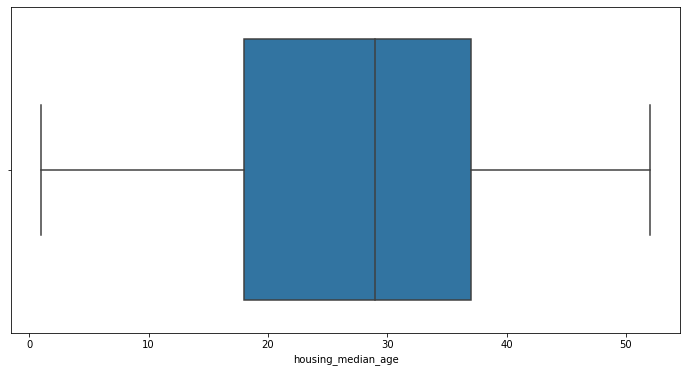

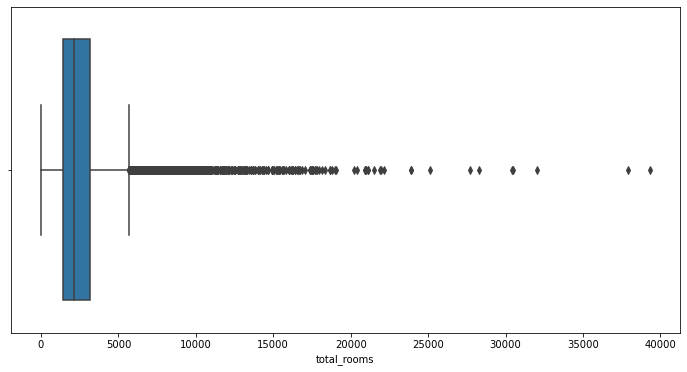

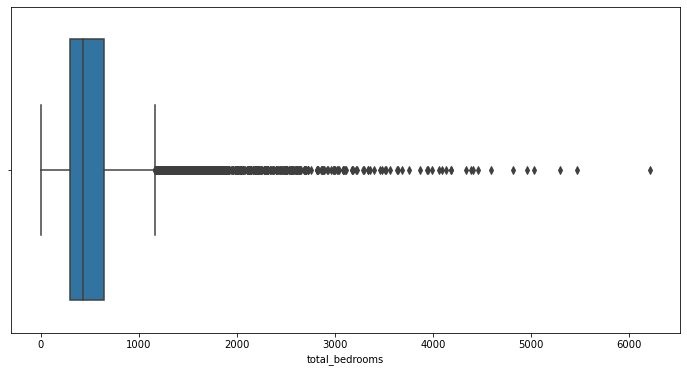

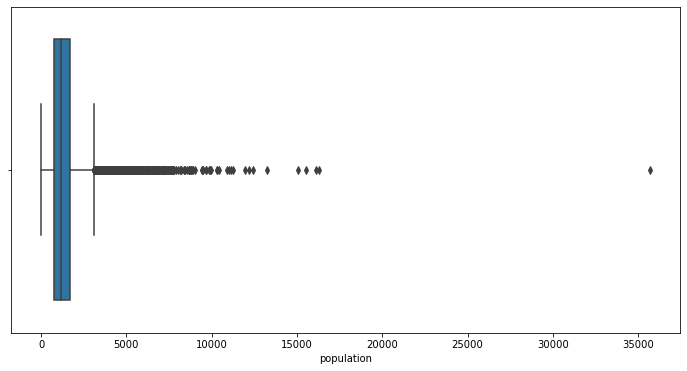

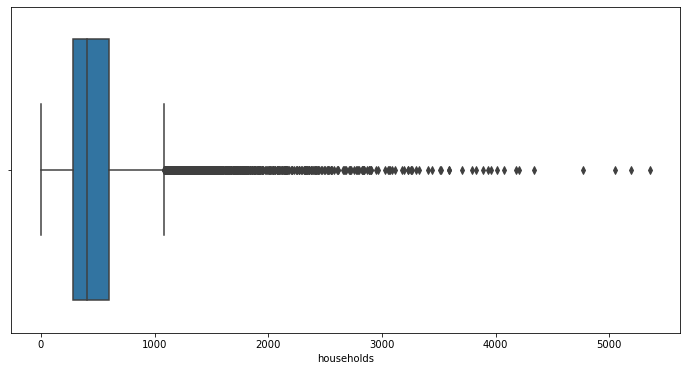

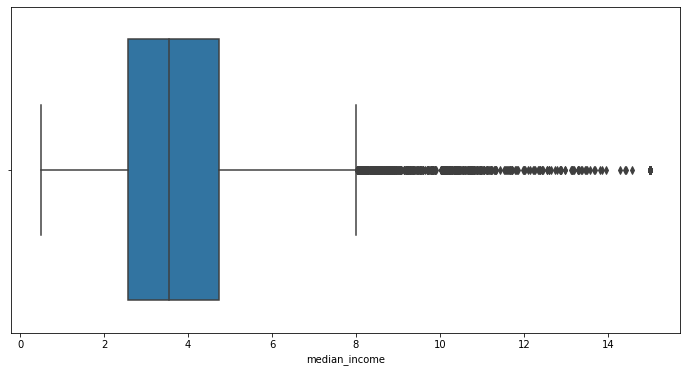

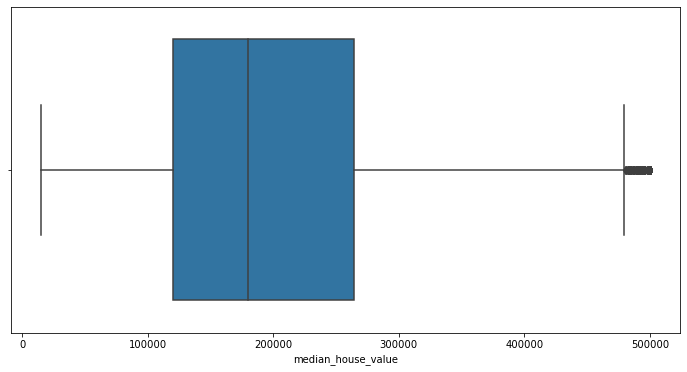

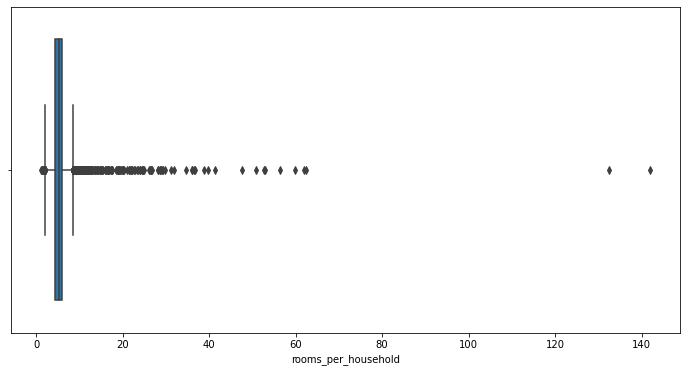

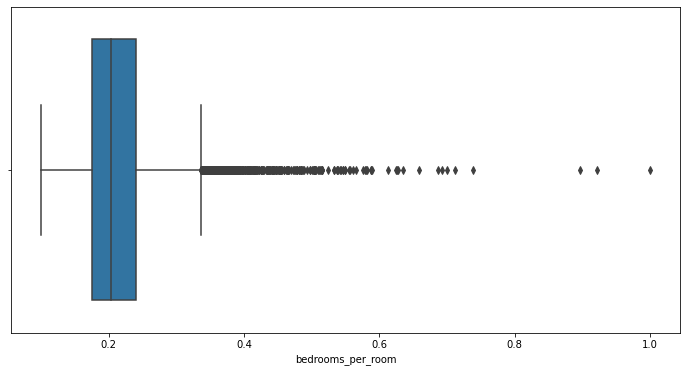

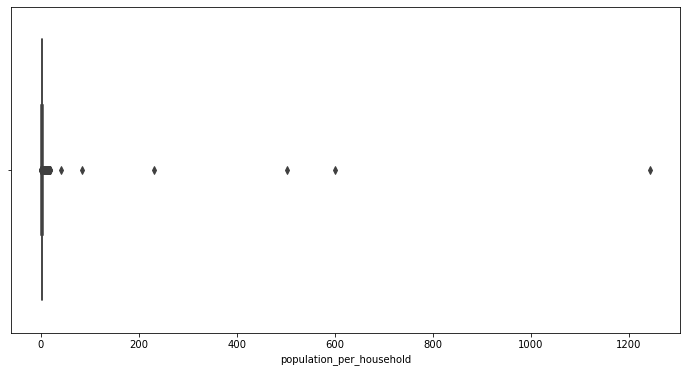

In [41]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data1,ax=ax)

By studying above box plots in details (I've not mentioned that in this notebook) as well as scatter plot of Median_House_Value vs. Median_Income, I decided following conditions to remove outliers.

I also used Tableau to get interactive plots

In [42]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) | (X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X

In [43]:
data1=RemoveOutliers().fit_transform(data1)

In [44]:
data_labels=data1['median_house_value']
data1=data1.drop('median_house_value',axis=1)

# Transforming skewed features

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>,
        <AxesSubplot:>]], dtype=object)

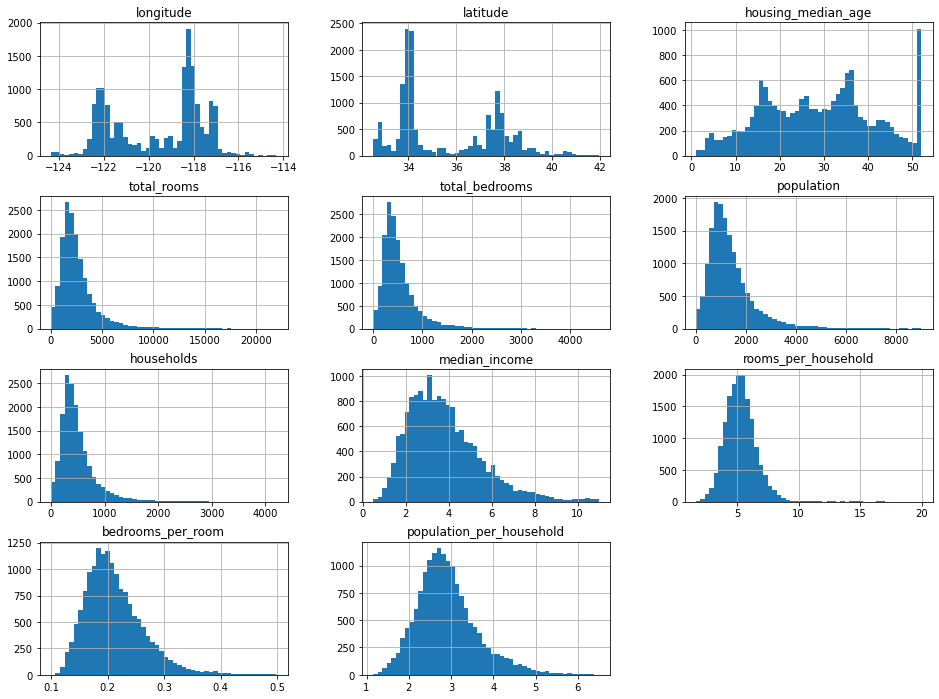

In [45]:
data1.hist(bins=50,figsize=(16,12))

In [46]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

Get skewness of features

In [47]:
skewness=[]
for i in num_features:
    skewness.append(data1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
total_rooms,2.903079
total_bedrooms,2.684883
households,2.629791
population,2.454352
rooms_per_household,2.168956
bedrooms_per_room,1.158782
median_income,1.051260
population_per_household,0.902000
latitude,0.462461
housing_median_age,0.061053


I transformed features using log1p and boxcox1p functions.

boxcox1p is used for highly skewed features

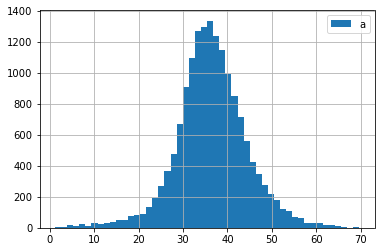

In [49]:
data1['households'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [50]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X

In [51]:
data1=FeaturesTransformer().fit_transform(data1)

# Transformed features

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>,
        <AxesSubplot:>]], dtype=object)

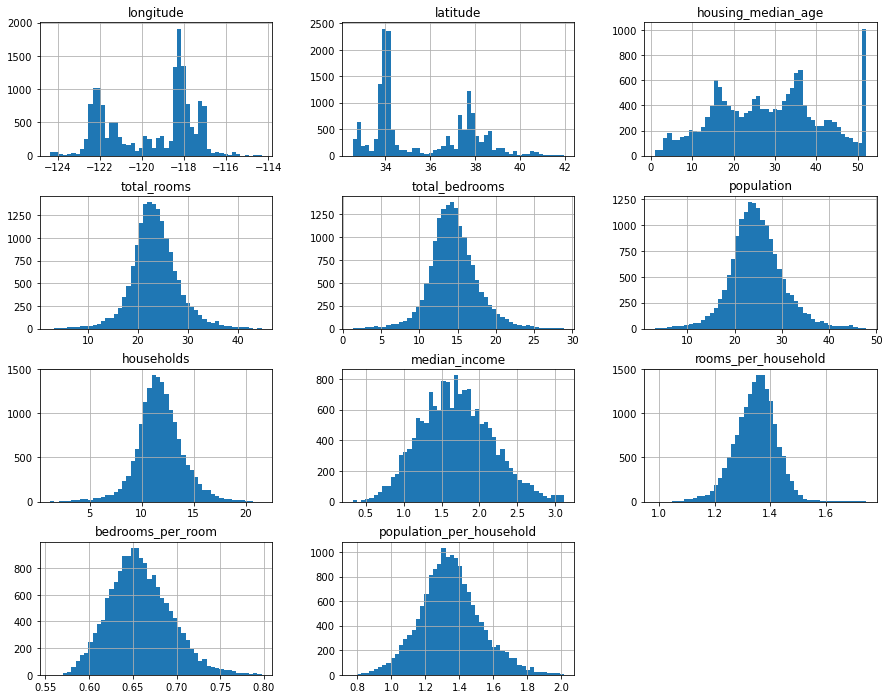

In [52]:
data1.hist(bins=50,figsize=(15,12))

This is all the data manupulation I have done. Following is the summarization:

Adding new featues

Removing outliers

Transforming skewed features

Null value imputation

